# Date 2 Week 

In [1]:
import pandas as pd

def check_year(x):
    if x['date'].month == 1 and x['week'] in [52, 53]:
        return x['year'] - 1 
    else:
        return x['year']
    
    
path = 'raw/covidinfo/ltla_2022-02-25.csv'
df = pd.read_csv(path)
DateSeries = pd.to_datetime(df['date'].drop_duplicates().reset_index(drop = True))
WeekSeries = DateSeries.dt.isocalendar().week
YearSeries = DateSeries.dt.year

DateTable = pd.DataFrame({'date': DateSeries, 'year': YearSeries, 'week':WeekSeries})
DateTable = DateTable.sort_values('date').reset_index(drop = True)


DateTable['weekday'] = DateTable['date'].dt.weekday + 1
DateTable['year'] = DateTable.apply(lambda x: check_year(x), axis = 1)
DateTable['yweek'] = DateTable.apply(lambda x: '{}-w{:02d}'.format(x['year'], x['week']), axis = 1)
DateTable['yweek_Tu'] = DateTable['yweek'].shift(1)
DateTable['yweek_Wd'] = DateTable['yweek'].shift(2)
DateTable['yweek_Th'] = DateTable['yweek'].shift(3)
DateTable['yweek_Fr'] = DateTable['yweek'].shift(-1)
DateTable['yweek_Sa'] = DateTable['yweek'].shift(-2)
DateTable['yweek_Sn'] = DateTable['yweek'].shift(-3)

yweek = '2022-w07'
print(DateTable['yweek'].value_counts().sort_index())
DateTable

2020-w05    4
2020-w06    7
2020-w07    7
2020-w08    7
2020-w09    7
           ..
2022-w04    7
2022-w05    7
2022-w06    7
2022-w07    7
2022-w08    4
Name: yweek, Length: 109, dtype: int64


,date,year,week,weekday,yweek,yweek_Tu,yweek_Wd,yweek_Th,yweek_Fr,yweek_Sa,yweek_Sn
0,2020-01-30,2020,5,4,2020-w05,NaN,NaN,NaN,2020-w05,2020-w05,2020-w05
1,2020-01-31,2020,5,5,2020-w05,2020-w05,NaN,NaN,2020-w05,2020-w05,2020-w06
2,2020-02-01,2020,5,6,2020-w05,2020-w05,2020-w05,NaN,2020-w05,2020-w06,2020-w06
3,2020-02-02,2020,5,7,2020-w05,2020-w05,2020-w05,2020-w05,2020-w06,2020-w06,2020-w06
4,2020-02-03,2020,6,1,2020-w06,2020-w05,2020-w05,2020-w05,2020-w06,2020-w06,2020-w06
...,...,...,...,...,...,...,...,...,...,...,...
752,2022-02-20,2022,7,7,2022-w07,2022-w07,2022-w07,2022-w07,2022-w08,2022-w08,2022-w08
753,2022-02-21,2022,8,1,2022-w08,2022-w07,2022-w07,2022-w07,2022-w08,2022-w08,2022-w08
754,2022-02-22,2022,8,2,2022-w08,2022-w08,2022-w07,2022-w07,2022-w08,2022-w08,NaN
755,2022-02-23,2022,8,3,2022-w08,2022-w08,2022-w08,2022-w07,2022-w08,NaN,NaN


In [2]:
yearweek_to_idx = DateTable['yweek'].value_counts().sort_index().reset_index()
yearweek_to_idx.columns = ['yweek', 'freq']
yearweek_to_idx['yweek_idx'] = yearweek_to_idx.index + int(yearweek_to_idx['yweek'].values[0].split('-w')[-1])
yearweek_to_idx = yearweek_to_idx[['yweek', 'yweek_idx']]
yearweek_to_idx

,yweek,yweek_idx
0,2020-w05,5
1,2020-w06,6
2,2020-w07,7
3,2020-w08,8
4,2020-w09,9
...,...,...
104,2022-w04,109
105,2022-w05,110
106,2022-w06,111
107,2022-w07,112


# City Info

## City Covariates

In [3]:
import pandas as pd

path = 'data/ltla_neighbours_df.csv'
ltla_neighbours_df = pd.read_csv(path)# .rename(columns = {'LAD21NM': 'areaName',})
ltla_neighbours_df['neighboors'] = ltla_neighbours_df['neighboors'].apply(eval)
# ltla_neighbours_df

path = 'data/ltla_region_england.csv'
ltla_region_england_df = pd.read_csv(path).rename(columns = {'LAD21CD': 'areaCode',
                                                            'LAD21NM': 'areaName',})
path = 'data/ltal_covariates_df.csv'
tmp = pd.read_csv(path)
ltla_df = pd.merge(ltla_region_england_df, tmp)
# ltla_df = pd.merge(ltla_df, ltla_neighbours_df)
ltla_df['areaidx'] = list(range(1, len(ltla_df) + 1))

ltla_covariate_df = ltla_df
ltla_covariate_df

,areaCode,areaName,NHSER21CD,NHSER21NM,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,areaidx
0,E06000001,Hartlepool,E40000009,North East and Yorkshire,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,1
1,E06000002,Middlesbrough,E40000009,North East and Yorkshire,0.258597,0.315276,141285,36.3,2616,40.5,53.8816,37.015974,39.302367,0.505057,2
2,E06000003,Redcar and Cleveland,E40000009,North East and Yorkshire,0.378299,0.280907,137228,45.2,560,29.8,245.0698,42.037639,44.115800,0.514633,3
3,E06000004,Stockton-on-Tees,E40000009,North East and Yorkshire,0.299317,0.299981,197419,40.7,963,25.8,204.9331,39.646713,41.726862,0.505058,4
4,E06000005,Darlington,E40000009,North East and Yorkshire,0.333318,0.284279,107402,43.2,541,25.7,197.4758,41.155788,42.778638,0.513445,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,E09000029,Sutton,E40000003,London,0.238610,0.314247,207707,39.5,4706,14.0,43.8479,38.056436,39.842322,0.512202,301
301,E09000030,Tower Hamlets,E40000003,London,0.088241,0.257283,331969,31.6,16427,27.9,19.7710,32.614445,32.569271,0.474219,302
302,E09000031,Waltham Forest,E40000003,London,0.161879,0.307642,276940,35.2,7137,25.2,38.8102,35.037225,36.734122,0.495299,303
303,E09000032,Wandsworth,E40000003,London,0.133132,0.238689,329735,34.0,9624,16.6,34.2619,34.995129,35.965513,0.520603,304


## City Covid (Day)

In [4]:
import pandas as pd 

path = 'raw/covidinfo/ltla_2022-02-25.csv'
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['areaCode', 'date']).reset_index(drop = True)
ltla_covid_df = df[df['areaCode'].isin(ltla_df['areaCode'])].reset_index(drop = True)
ltla_covid_df['dateidx'] = ltla_covid_df['date'].apply(lambda x: (x-pd.to_datetime('2020-01-01')).days)

ltla_covid_df

,areaCode,areaName,areaType,date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate,dateidx
0,E06000001,Hartlepool,ltla,2020-03-16,1,1.1,1.0,75
1,E06000001,Hartlepool,ltla,2020-03-17,1,1.1,0.0,76
2,E06000001,Hartlepool,ltla,2020-03-18,2,2.1,1.0,77
3,E06000001,Hartlepool,ltla,2020-03-19,2,2.1,0.0,78
4,E06000001,Hartlepool,ltla,2020-03-20,3,3.2,1.0,79
...,...,...,...,...,...,...,...,...
218886,E09000033,Westminster,ltla,2022-02-20,58626,21725.6,137.0,781
218887,E09000033,Westminster,ltla,2022-02-21,58767,21777.8,141.0,782
218888,E09000033,Westminster,ltla,2022-02-22,58913,21831.9,146.0,783
218889,E09000033,Westminster,ltla,2022-02-23,59035,21877.1,122.0,784


## City Covid (Week)

### [JUMP HERE] yweek col

In [5]:
yweek_col = 'yweek'

In [6]:
def get_weekdf_info(week_df):
    d = week_df[['areaCode', 'areaName', 'areaType', yweek_col]].iloc[0].to_dict()
    d['cumCasesWeek'] =  week_df['cumCasesBySpecimenDate'].max()
    d['newCasesWeek'] = week_df['newCasesBySpecimenDate'].sum()
    d['records'] = len(week_df)
    return d

tmp = pd.merge(ltla_covid_df, DateTable[['date', yweek_col]])
ltla_covid_df_weekly = pd.DataFrame()
for city, city_df in tmp.groupby('areaName'):
    df = city_df
    city_df_by_week = pd.DataFrame(df.groupby(yweek_col).apply(get_weekdf_info).to_list())
    unfull = city_df_by_week[city_df_by_week['records'] != 7][yweek_col].values
    assert len(unfull) <= 2
    city_df_by_week = city_df_by_week[city_df_by_week['records'] == 7]
    ltla_covid_df_weekly  = pd.concat([ltla_covid_df_weekly, city_df_by_week]) 
    
ltla_covid_df_w = ltla_covid_df_weekly.reset_index(drop = True)
ltla_covid_df_w = pd.merge(ltla_covid_df_w, yearweek_to_idx)
ltla_covid_df_w = ltla_covid_df_w.sort_values(['areaCode', yweek_col]).reset_index(drop = True)
ltla_covid_df_w

,areaCode,areaName,areaType,yweek,cumCasesWeek,newCasesWeek,records,yweek_idx
0,E06000001,Hartlepool,ltla,2020-w12,3,3.0,7,12
1,E06000001,Hartlepool,ltla,2020-w13,12,9.0,7,13
2,E06000001,Hartlepool,ltla,2020-w14,39,27.0,7,14
3,E06000001,Hartlepool,ltla,2020-w15,88,49.0,7,15
4,E06000001,Hartlepool,ltla,2020-w16,161,73.0,7,16
...,...,...,...,...,...,...,...,...
30951,E09000033,Westminster,ltla,2022-w03,52780,2010.0,7,108
30952,E09000033,Westminster,ltla,2022-w04,54712,1932.0,7,109
30953,E09000033,Westminster,ltla,2022-w05,56278,1566.0,7,110
30954,E09000033,Westminster,ltla,2022-w06,57580,1302.0,7,111


# City Covid Covariates

In [7]:
areaName_areaidx_df = ltla_df[['areaName', 'areaidx']]

In [8]:
ltla_covid_df_w.columns

Index(['areaCode', 'areaName', 'areaType', 'yweek', 'cumCasesWeek',
       'newCasesWeek', 'records', 'yweek_idx'],
      dtype='object')

In [9]:
ltla_covid_covariate_df = pd.merge(ltla_covid_df_w, ltla_covariate_df[['areaCode', 'NHSER21NM',
       'old_dependency_ratio', 'young_dependency_ratio', 'popu_all',
       'Median age', 'People per sq. km', 'Average Score', 'Area (sq km)',
       'male_avg_age', 'female_avg_age', 'female_rate', 'areaidx']], on = 'areaCode')

ltla_covid_covariate_df['new_case_per_10k'] = ltla_covid_covariate_df['newCasesWeek'] / ltla_covid_covariate_df['popu_all'] * 10000


cols = [# areaidx
        'areaidx', 'areaCode', 'areaName', 'areaType', 'NHSER21NM',
        # date
        'yweek_idx', yweek_col, #'yweek_d', 
        # y
        'new_case_per_10k', 'cumCasesWeek', 'newCasesWeek', 
        # features
        'old_dependency_ratio', 'young_dependency_ratio', 'popu_all',
       'Median age', 'People per sq. km', 'Average Score', 'Area (sq km)',
       'male_avg_age', 'female_avg_age', 'female_rate', 
       ]


ltla_covid_covariate_df = ltla_covid_covariate_df[cols]
# ltla_covid_covariate_df.to_clipboard()
ltla_covid_covariate_df


,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,12,2020-w12,0.319707,3,3.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,13,2020-w13,0.959120,12,9.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,14,2020-w14,2.877361,39,27.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,15,2020-w15,5.221876,88,49.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,16,2020-w16,7.779530,161,73.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30951,305,E09000033,Westminster,ltla,London,108,2022-w03,74.486378,52780,2010.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30952,305,E09000033,Westminster,ltla,London,109,2022-w04,71.595861,54712,1932.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30953,305,E09000033,Westminster,ltla,London,110,2022-w05,58.032670,56278,1566.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30954,305,E09000033,Westminster,ltla,London,111,2022-w06,48.249385,57580,1302.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677


In [10]:
ltla_covid_covariate_df.to_csv('data/week/all_cities_yx_{}.csv'.format(yweek_col), index = False)

In [11]:
# dateidx = 10
# convert_dateidx_to_date(dateidx)


def convert_dateidx_to_date(dateidx):
    return (pd.to_timedelta(dateidx, unit = 'D') + pd.to_datetime('2020-01-01')).date()

def convert_date_to_dateidx(date):
    return (pd.to_datetime(date) - pd.to_datetime('2020-01-01')).days

def convert_areaName_to_areaidx(areaName):
    df = areaName_areaidx_df
    return df[df['areaName'] == areaName].iloc[0]['areaidx']

def convert_areaidx_to_areaName(areaidx):
    df = areaName_areaidx_df
    return df[df['areaidx'] == areaidx].iloc[0]['areaName']


# Game Info

In [12]:
ltla_game_df = pd.read_csv('data/ltla_game_df.csv')
ltla_game_df['date'] = pd.to_datetime(ltla_game_df['date'])
ltla_game_df[ltla_game_df['date'].dt.year.isin([2020, 2021])].reset_index(drop = True)

,date,city,score,scoreB,host,win,tie,loss,max,gap,game,last_game_date,last_host_game_date,next_game_date,next_host_game_date
0,2020-01-01,Birmingham,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,2019-12-28,2019-12-26,2020-01-12,2020-01-12
1,2020-01-12,Birmingham,1.0,6.0,1.0,0.0,0.0,1.0,6.0,-5.0,1.0,2020-01-01,2019-12-26,2020-01-18,2020-01-21
2,2020-01-18,Birmingham,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2020-01-12,2020-01-12,2020-01-21,2020-01-21
3,2020-01-21,Birmingham,2.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2020-01-18,2020-01-12,2020-02-01,2020-02-16
4,2020-02-01,Birmingham,1.0,2.0,0.0,0.0,0.0,1.0,2.0,-1.0,1.0,2020-01-21,2020-01-21,2020-02-16,2020-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,2021-12-01,Wolverhampton,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2021-11-27,2021-11-20,2021-12-04,2021-12-04
1321,2021-12-04,Wolverhampton,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,2021-12-01,2021-12-01,2021-12-11,2021-12-19
1322,2021-12-11,Wolverhampton,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,1.0,2021-12-04,2021-12-04,2021-12-15,2021-12-19
1323,2021-12-15,Wolverhampton,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2021-12-11,2021-12-04,2021-12-19,2021-12-19


## Weekday Info

In [13]:
(ltla_game_df['date'].dt.weekday + 1).value_counts()

6    738
7    476
3    153
1    120
2     99
4     73
5     64
Name: date, dtype: int64

# YWeek

In [14]:
ltla_game_df = pd.read_csv('data/ltla_game_df.csv')
ltla_game_df['date'] = pd.to_datetime(ltla_game_df['date'])

date_to_yweek = DateTable[['date', yweek_col]].drop_duplicates().sort_values('date').reset_index(drop = True)

In [15]:
ltla_game_df = pd.merge(ltla_game_df, date_to_yweek, on = 'date')

cols = ['date', 'city', 'score', 'scoreB', 'host', 'win', 'tie', 'loss', 'max',
       'gap', 'game', yweek_col]

ltla_game_df = ltla_game_df[cols]
ltla_game_df

,date,city,score,scoreB,host,win,tie,loss,max,gap,game,yweek
0,2020-02-01,Birmingham,1.0,2.0,0.0,0.0,0.0,1.0,2.0,-1.0,1.0,2020-w05
1,2020-02-01,"Bournemouth, Christchurch and Poole",2.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2020-w05
2,2020-02-01,Brighton and Hove,3.0,3.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,2020-w05
3,2020-02-01,Hammersmith and Fulham,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2020-w05
4,2020-02-01,Leicester,2.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,2020-w05
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,2020-06-28,Watford,1.0,3.0,1.0,0.0,0.0,1.0,3.0,-2.0,1.0,2020-w26
1309,2020-07-13,Southampton,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2020-w29
1310,2020-07-13,Trafford,2.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,2020-w29
1311,2022-01-03,Trafford,0.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,2022-w01


In [17]:
def get_info_df_city_yweek(df_city_yweek):
    df_city_yweek['weekday'] = df_city_yweek['date'].dt.weekday + 1
    df_city_yweek = df_city_yweek.sort_values('date')

    d = {} 
    d['city'] = df_city_yweek['city'].values[0]
    d[yweek_col] = df_city_yweek[yweek_col].values[0]
    d['games_num'] = len(df_city_yweek)
    for i in range(1, 8):
        if i in df_city_yweek['weekday'].values:
            d['weekday{}'.format(i)] = 1
        else:
            d['weekday{}'.format(i)] = 0
            
    for i in ['score', 'scoreB', 'host', 'win', 'tie', 'loss']:
        d[i] = df_city_yweek[i].mean()

    for i in ['max', 'gap']:
        d[i] = df_city_yweek[i].abs().max()
        
    return d

ltla_game_df_w = pd.DataFrame()
for city, df_city in ltla_game_df.groupby('city'):
    result = df_city.groupby(yweek_col).apply(get_info_df_city_yweek)
    result = pd.DataFrame(result.to_list())
    # if city == 'Liverpool':
    #     break
    ltla_game_df_w = pd.concat([ltla_game_df_w, result])
    
    
ltla_game_df_w = ltla_game_df_w.reset_index(drop = True)
ltla_game_df_w

,city,yweek,games_num,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,score,scoreB,host,win,tie,loss,max,gap
0,Birmingham,2020-w05,1,0,0,0,0,0,1,0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0
1,Birmingham,2020-w07,1,0,0,0,0,0,0,1,2.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0
2,Birmingham,2020-w08,1,0,0,0,0,0,1,0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0
3,Birmingham,2020-w25,1,0,0,0,0,0,0,1,1.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0
4,Birmingham,2020-w26,2,0,0,1,0,0,1,0,0.5,1.0,0.5,0.0,0.5,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Wolverhampton,2021-w49,1,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1012,Wolverhampton,2021-w50,2,0,0,1,0,0,0,1,0.5,0.0,0.5,0.5,0.5,0.0,1.0,1.0
1013,Wolverhampton,2022-w01,1,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1014,Wolverhampton,2022-w02,1,0,0,0,0,0,1,0,3.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0


In [18]:
game_schedule = ltla_game_df_w.pivot_table(values='games_num', index=yweek_col, columns= 'city').sort_index()
game_schedule

city,Birmingham,"Bournemouth, Christchurch and Poole",Brighton and Hove,Burnley,Croydon,East Hampshire,Hammersmith and Fulham,Haringey,Hounslow,Islington,...,Liverpool,Manchester,Newcastle upon Tyne,Newham,Norwich,Sheffield,Southampton,Trafford,Watford,Wolverhampton
yweek,,,,,,,,,,,,,,,,,,,,,
2020-w05,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
2020-w06,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-w07,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2020-w08,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
2020-w09,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,...,3.0,NaN,1.0,2.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-w51,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2021-w52,1.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,...,1.0,2.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,NaN
2022-w01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


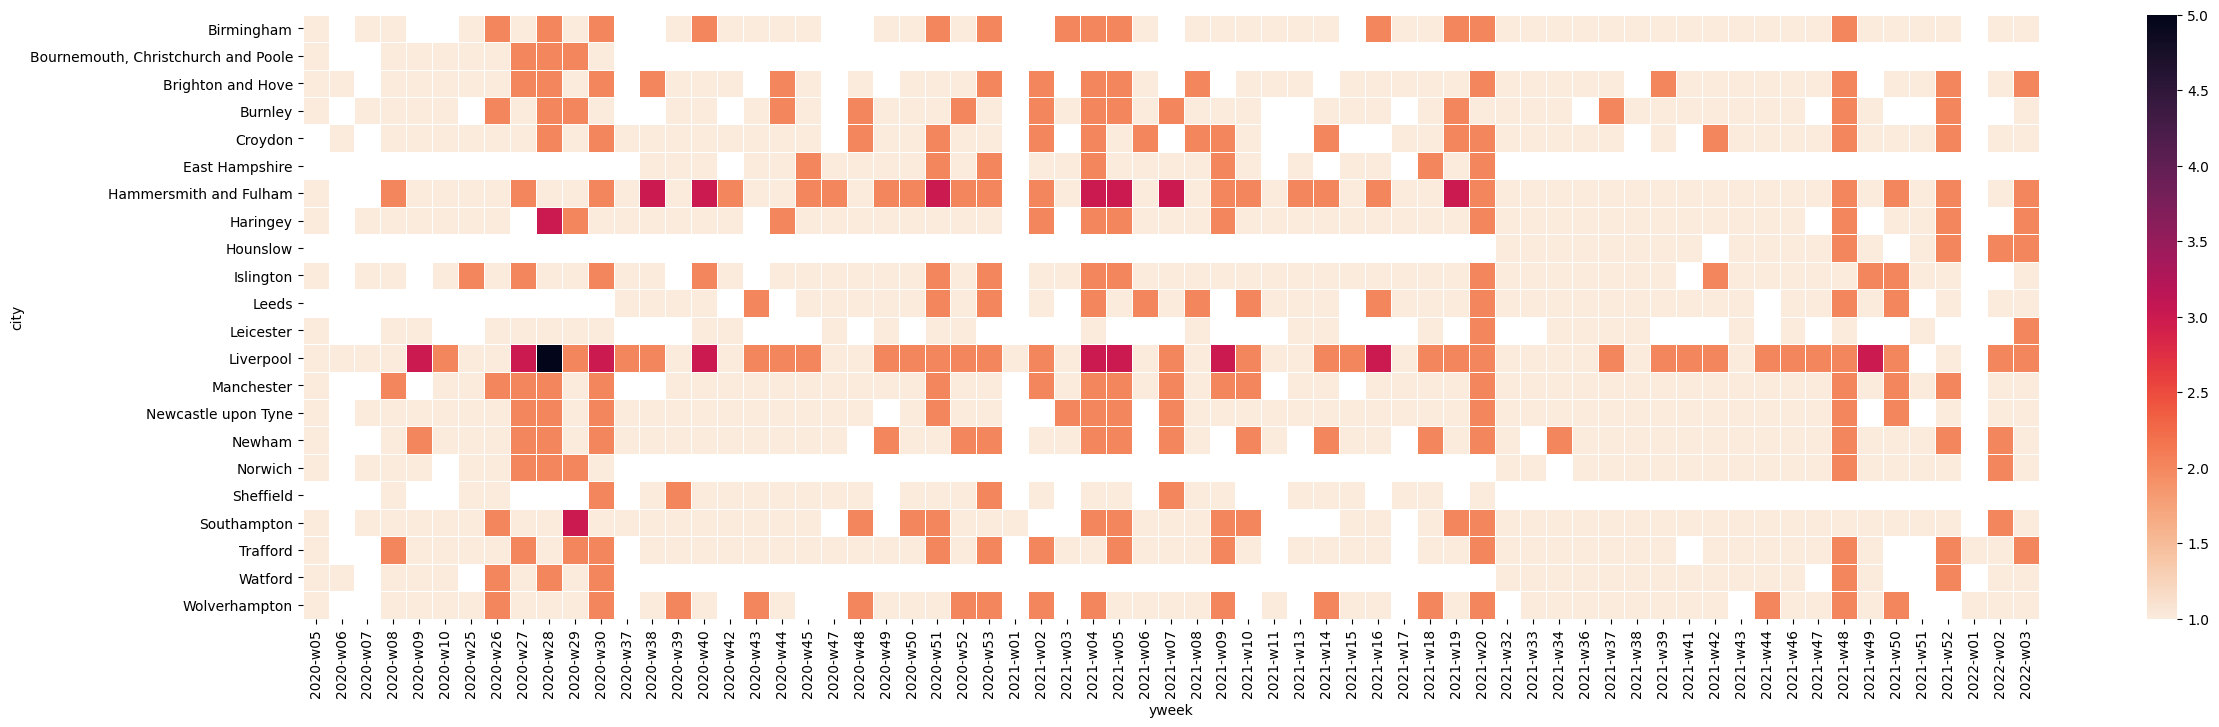

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 8), dpi = 100)
ax = sns.heatmap(game_schedule.T, cmap="rocket_r", linewidths=0.4)


In [20]:
ltla_game_df_w.to_csv('data/week/all_games_d_{}.csv'.format(yweek_col), index = False)

# Full Data

In [21]:
ltla_game_df_w = ltla_game_df_w.rename(columns = {"city": "areaName"})
ltla_game_df_w

,areaName,yweek,games_num,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,score,scoreB,host,win,tie,loss,max,gap
0,Birmingham,2020-w05,1,0,0,0,0,0,1,0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0
1,Birmingham,2020-w07,1,0,0,0,0,0,0,1,2.0,3.0,1.0,0.0,0.0,1.0,3.0,1.0
2,Birmingham,2020-w08,1,0,0,0,0,0,1,0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0
3,Birmingham,2020-w25,1,0,0,0,0,0,0,1,1.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0
4,Birmingham,2020-w26,2,0,0,1,0,0,1,0,0.5,1.0,0.5,0.0,0.5,0.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Wolverhampton,2021-w49,1,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1012,Wolverhampton,2021-w50,2,0,0,1,0,0,0,1,0.5,0.0,0.5,0.5,0.5,0.0,1.0,1.0
1013,Wolverhampton,2022-w01,1,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1014,Wolverhampton,2022-w02,1,0,0,0,0,0,1,0,3.0,1.0,1.0,1.0,0.0,0.0,3.0,2.0


In [22]:
final_df = pd.merge(ltla_covid_covariate_df, ltla_game_df_w, on = ['areaName', yweek_col], how = 'left')
final_df

,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,...,weekday6,weekday7,score,scoreB,host,win,tie,loss,max,gap
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,12,2020-w12,0.319707,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,13,2020-w13,0.959120,12,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,14,2020-w14,2.877361,39,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,15,2020-w15,5.221876,88,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,16,2020-w16,7.779530,161,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30951,305,E09000033,Westminster,ltla,London,108,2022-w03,74.486378,52780,2010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30952,305,E09000033,Westminster,ltla,London,109,2022-w04,71.595861,54712,1932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30953,305,E09000033,Westminster,ltla,London,110,2022-w05,58.032670,56278,1566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30954,305,E09000033,Westminster,ltla,London,111,2022-w06,48.249385,57580,1302.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cols = ['areaidx', 'areaCode', 'areaName', 'areaType', 'NHSER21NM', 
        'yweek_idx', yweek_col, 
        'new_case_per_10k', 'cumCasesWeek', 'newCasesWeek',
        
        'games_num', 'host', 'win', 'tie', 'loss', 
        'max', 'gap', 'score', 'scoreB', 
        'weekday1', 'weekday2', 'weekday3', 'weekday4', 'weekday5', 'weekday6', 'weekday7', 
        
        'old_dependency_ratio', 'young_dependency_ratio', 'popu_all',
        'Median age', 'People per sq. km', 'Average Score', 'Area (sq km)',
        'male_avg_age', 'female_avg_age', 'female_rate', ]

final_df = final_df[cols]
final_df

,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,...,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,12,2020-w12,0.319707,3,3.0,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,13,2020-w13,0.959120,12,9.0,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,14,2020-w14,2.877361,39,27.0,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,15,2020-w15,5.221876,88,49.0,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,16,2020-w16,7.779530,161,73.0,...,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30951,305,E09000033,Westminster,ltla,London,108,2022-w03,74.486378,52780,2010.0,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30952,305,E09000033,Westminster,ltla,London,109,2022-w04,71.595861,54712,1932.0,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30953,305,E09000033,Westminster,ltla,London,110,2022-w05,58.032670,56278,1566.0,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30954,305,E09000033,Westminster,ltla,London,111,2022-w06,48.249385,57580,1302.0,...,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677


In [25]:
final_df.to_csv('data/week/all_cities_ydz_{}.csv'.format(yweek_col), index = False)

# [JUMP] Data Prepare

In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)

yweek_col = 'yweek'
final_df = pd.read_csv('data/week/all_cities_ydz_{}.csv'.format(yweek_col))
final_df

,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,games_num,host,win,tie,loss,max,gap,score,scoreB,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,12,2020-w12,0.319707,3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,13,2020-w13,0.959120,12,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,14,2020-w14,2.877361,39,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,15,2020-w15,5.221876,88,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,16,2020-w16,7.779530,161,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30951,305,E09000033,Westminster,ltla,London,108,2022-w03,74.486378,52780,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30952,305,E09000033,Westminster,ltla,London,109,2022-w04,71.595861,54712,1932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30953,305,E09000033,Westminster,ltla,London,110,2022-w05,58.032670,56278,1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30954,305,E09000033,Westminster,ltla,London,111,2022-w06,48.249385,57580,1302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677


In [27]:
GameCityList = list(final_df[- final_df['games_num'].isna()]['areaName'].unique())
print(len(GameCityList))
# GameCityList

22


In [28]:
path = 'data/ltla_neighbours_df.csv'
ltla_neighbours_df = pd.read_csv(path).rename(columns = {'LAD21NM': 'areaName',})
ltla_neighbours_df = ltla_neighbours_df[ltla_neighbours_df['areaName'].isin(GameCityList)]
NeighborCityList = list(set(sum(ltla_neighbours_df['neighboors'].apply(eval).to_list(), [])))
NeighborCityList = [i for i in NeighborCityList if i not in GameCityList]
print(len(NeighborCityList))
# NeighborCityList

86


In [29]:
# PAY ATTENTION HERE
# DROP NeighborCityList or Not
final_df = final_df[-final_df['areaName'].isin(NeighborCityList)]
final_df

,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,games_num,host,win,tie,loss,max,gap,score,scoreB,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,12,2020-w12,0.319707,3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,13,2020-w13,0.959120,12,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,14,2020-w14,2.877361,39,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,15,2020-w15,5.221876,88,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,16,2020-w16,7.779530,161,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30951,305,E09000033,Westminster,ltla,London,108,2022-w03,74.486378,52780,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30952,305,E09000033,Westminster,ltla,London,109,2022-w04,71.595861,54712,1932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30953,305,E09000033,Westminster,ltla,London,110,2022-w05,58.032670,56278,1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677
30954,305,E09000033,Westminster,ltla,London,111,2022-w06,48.249385,57580,1302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677


## Game Seasons

In [30]:
start_time = '2020-w19'
treat_time = '2020-w25'
end_time   = '2020-w30'
season_name = 'S1A1'

### Your Operation

df = final_df[(final_df[yweek_col] >= start_time) & (final_df[yweek_col] <= end_time)].reset_index(drop = True)
df['season'] = season_name
df['areaNameS'] = df['areaName'] + df['season']
tmp = df.groupby('areaName')['games_num'].sum()
tmp = tmp[tmp > 0]
treat = list(tmp.index)
df['treat'] = df['areaName'].isin(treat).astype(int)
df['post'] = df[yweek_col].apply(lambda x: int(x >= treat_time))
# df[df['areaName'] == 'Liverpool']
final_df_s1 = df

In [31]:
start_time = '2020-w31'
treat_time = '2020-w37'
end_time   = '2020-w43'
season_name = 'S2A2'

### Your Operation

df = final_df[(final_df[yweek_col] >= start_time) & (final_df[yweek_col] <= end_time)].reset_index(drop = True)
df['season'] = season_name
df['areaNameS'] = df['areaName'] + df['season']
tmp = df.groupby('areaName')['games_num'].sum()
tmp = tmp[tmp > 0]
treat = list(tmp.index)
df['treat'] = df['areaName'].isin(treat).astype(int)
df['post'] = df[yweek_col].apply(lambda x: int(x >= treat_time))

final_df_s2 = df
# df[df['areaName'] == 'Liverpool']

In [32]:
start_time = '2020-w44'
treat_time = '2020-w49'
end_time   = '2020-w53'
season_name = 'S3B1'

### Your Operation

df = final_df[(final_df[yweek_col] >= start_time) & (final_df[yweek_col] <= end_time)].reset_index(drop = True)
df['season'] = season_name
df['areaNameS'] = df['areaName'] + df['season']
tmp = df.groupby('areaName')['games_num'].sum()
tmp = tmp[tmp > 0]
treat = list(tmp.index)
df['treat'] = df['areaName'].isin(treat).astype(int)
df['post'] = df[yweek_col].apply(lambda x: int(x >= treat_time))
# df[df['areaName'] == 'Liverpool']
final_df_a1 = df

In [33]:
start_time = '2021-w11'
treat_time = '2021-w17'
end_time   = '2021-w22'
season_name = 'S4B2'

### Your Operation

df = final_df[(final_df[yweek_col] >= start_time) & (final_df[yweek_col] <= end_time)].reset_index(drop = True)
df['season'] = season_name
df['areaNameS'] = df['areaName'] + df['season']
tmp = df.groupby('areaName')['games_num'].sum()
tmp = tmp[tmp > 0]
treat = list(tmp.index)
df['treat'] = df['areaName'].isin(treat).astype(int)
df['post'] = df[yweek_col].apply(lambda x: int(x >= treat_time))
# df[df['areaName'] == 'Liverpool']
final_df_a2 = df

In [34]:
final_df_s3 = final_df[(final_df[yweek_col] >= '2021-w25') & (final_df[yweek_col] <= '2021-w37' )].reset_index(drop = True)
final_df_s3


start_time = '2021-w26'
treat_time = '2021-w32'
end_time   = '2021-w37'
season_name = 'S5A3'

### Your Operation

df = final_df[(final_df[yweek_col] >= start_time) & (final_df[yweek_col] <= end_time)].reset_index(drop = True)
df['season'] = season_name
df['areaNameS'] = df['areaName'] + df['season']
tmp = df.groupby('areaName')['games_num'].sum()
tmp = tmp[tmp > 0]
treat = list(tmp.index)
df['treat'] = df['areaName'].isin(treat).astype(int)
df['post'] = df[yweek_col].apply(lambda x: int(x >= treat_time))

final_df_s3 = df
df[df['areaName'] == 'Liverpool']

,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,games_num,host,win,tie,loss,max,gap,score,scoreB,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,season,areaNameS,treat,post
2352,249,E08000012,Liverpool,ltla,North West,79,2021-w26,54.448383,57018,2725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,0
2353,249,E08000012,Liverpool,ltla,North West,80,2021-w27,49.992607,59520,2502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,0
2354,249,E08000012,Liverpool,ltla,North West,81,2021-w28,51.930770,62119,2599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,0
2355,249,E08000012,Liverpool,ltla,North West,82,2021-w29,38.543461,64048,1929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,0
2356,249,E08000012,Liverpool,ltla,North West,83,2021-w30,36.305582,65865,1817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,0
2357,249,E08000012,Liverpool,ltla,North West,84,2021-w31,36.665241,67700,1835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,0
2358,249,E08000012,Liverpool,ltla,North West,85,2021-w32,37.704256,69587,1887.0,1.0,0.50,1.00,0.0,0.00,3.0,2.5,3.00,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,1
2359,249,E08000012,Liverpool,ltla,North West,86,2021-w33,35.046776,71341,1754.0,1.0,0.50,0.50,0.5,0.00,2.0,1.0,2.00,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,1
2360,249,E08000012,Liverpool,ltla,North West,87,2021-w34,34.527268,73069,1728.0,1.0,0.50,0.50,0.5,0.00,1.5,1.0,1.50,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,1
2361,249,E08000012,Liverpool,ltla,North West,88,2021-w35,41.680487,75155,2086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214742,0.241551,500474,34.8,4453,42.4,111.8357,36.823739,38.438335,0.499682,S5A3,LiverpoolS5A3,1,1


In [35]:
start_time = '2021-w43'
treat_time = '2021-w48'
end_time   = '2021-w52'
season_name = 'S6B3'

### Your Operation

df = final_df[(final_df[yweek_col] >= start_time) & (final_df[yweek_col] <= end_time)].reset_index(drop = True)
df['season'] = season_name
df['areaNameS'] = df['areaName'] + df['season']
tmp = df.groupby('areaName')['games_num'].sum()
tmp = tmp[tmp > 0]
treat = list(tmp.index)
df['treat'] = df['areaName'].isin(treat).astype(int)
df['post'] = df[yweek_col].apply(lambda x: int(x >= treat_time))
# df[df['areaName'] == 'Liverpool']
final_df_a3 = df

In [36]:
soccer_covid_data = pd.concat([final_df_s1, final_df_s2, final_df_s3,
                               final_df_a1, final_df_a2, final_df_a3,]).reset_index(drop = True)
soccer_covid_data

,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,games_num,host,win,tie,loss,max,gap,score,scoreB,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,season,areaNameS,treat,post
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,19,2020-w19,8.205806,415,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,20,2020-w20,7.459824,485,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,21,2020-w21,3.303636,516,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,22,2020-w22,2.237947,537,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,23,2020-w23,2.557654,561,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15175,305,E09000033,Westminster,ltla,London,101,2021-w48,36.872610,29584,995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1
15176,305,E09000033,Westminster,ltla,London,102,2021-w49,67.408319,31403,1819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1
15177,305,E09000033,Westminster,ltla,London,103,2021-w50,194.813376,36660,5257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1
15178,305,E09000033,Westminster,ltla,London,104,2021-w51,160.423646,40989,4329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1


In [37]:
import numpy as np
# soccer_covid_data['itidx'] = soccer_covid_data['areaidx'].astype(str) + '-' + soccer_covid_data['yweek_idx'].astype(str)
# soccer_covid_data['itidx'] = soccer_covid_data['itidx'].apply(lambda x: int(x.replace('-', '999' * (8 - len(x)))))
soccer_covid_data['treat_post'] = soccer_covid_data['treat'] * soccer_covid_data['post']
soccer_covid_data['win_rate'] = soccer_covid_data['win'] / soccer_covid_data['games_num'] 
soccer_covid_data['host_rate'] = soccer_covid_data['host'] / soccer_covid_data['games_num'] 
# soccer_covid_data['log_new_case_per_10k'] = np.log(soccer_covid_data['new_case_per_10k'])

# soccer_covid_data['win_rate'] = soccer_covid_data['win_rate'].fillna(0)
# soccer_covid_data['host_rate'] = soccer_covid_data['host_rate'].fillna(0)

soccer_covid_data = soccer_covid_data.fillna(0)

# soccer_covid_data


In [41]:
soccer_covid_data['log_new_case_per_10k'] = np.log(soccer_covid_data['new_case_per_10k'])
soccer_covid_data = soccer_covid_data[soccer_covid_data['log_new_case_per_10k'] != - np.inf]
soccer_covid_data

/Users/floydluo/opt/miniconda3/envs/on/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,areaidx,areaCode,areaName,areaType,NHSER21NM,yweek_idx,yweek,new_case_per_10k,cumCasesWeek,newCasesWeek,games_num,host,win,tie,loss,max,gap,score,scoreB,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6,weekday7,old_dependency_ratio,young_dependency_ratio,popu_all,Median age,People per sq. km,Average Score,Area (sq km),male_avg_age,female_avg_age,female_rate,season,areaNameS,treat,post,treat_post,win_rate,host_rate,log_new_case_per_10k
0,1,E06000001,Hartlepool,ltla,North East and Yorkshire,19,2020-w19,8.205806,415,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0,0,0.0,0.0,2.104842
1,1,E06000001,Hartlepool,ltla,North East and Yorkshire,20,2020-w20,7.459824,485,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0,0,0.0,0.0,2.009532
2,1,E06000001,Hartlepool,ltla,North East and Yorkshire,21,2020-w21,3.303636,516,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0,0,0.0,0.0,1.195024
3,1,E06000001,Hartlepool,ltla,North East and Yorkshire,22,2020-w22,2.237947,537,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0,0,0.0,0.0,0.805559
4,1,E06000001,Hartlepool,ltla,North East and Yorkshire,23,2020-w23,2.557654,561,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313702,0.288634,93836,41.7,999,35.0,93.7125,40.157418,42.190274,0.509730,S1A1,HartlepoolS1A1,0,0,0,0.0,0.0,0.939090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15175,305,E09000033,Westminster,ltla,London,101,2021-w48,36.872610,29584,995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1,0,0.0,0.0,3.607469
15176,305,E09000033,Westminster,ltla,London,102,2021-w49,67.408319,31403,1819.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1,0,0.0,0.0,4.210768
15177,305,E09000033,Westminster,ltla,London,103,2021-w50,194.813376,36660,5257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1,0,0.0,0.0,5.272042
15178,305,E09000033,Westminster,ltla,London,104,2021-w51,160.423646,40989,4329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175793,0.223543,269848,36.3,12167,20.3,21.4826,36.918846,38.427939,0.472677,S6B3,WestminsterS6B3,0,1,0,0.0,0.0,5.077818


In [42]:
# soccer_covid_data['log_new_case_per_10k'].describe()

In [43]:
soccer_covid_data.to_csv('data/week/data_season_did_ydz_{}.csv'.format(yweek_col), index = False)


In [125]:
# DateTable[DateTable[yweek_col].isin(['2020-w19', '2020-w25', '2020-w30'])]

In [124]:
# DateTable[DateTable[yweek_col].isin(['2021-w42', '2021-w52'])]

In [123]:
# DateTable[DateTable[yweek_col].isin(['2020-w44', '2020-w53'])]

## Game City

In [53]:
donor_cities_df = soccer_covid_data[soccer_covid_data['treat'] == 0]# ['areaName'].unique()
# donor_cities_df

In [106]:
game_cities = soccer_covid_data[soccer_covid_data['treat'] == 1]['areaName'].unique()

for game_city in game_cities:
    soccer_covid_data_game = pd.concat([soccer_covid_data[soccer_covid_data['areaName'] == game_city], donor_cities_df])
    print(game_city, soccer_covid_data_game.shape)
    soccer_covid_data_game.to_csv('data/gamecity/{}.csv'.format(game_city), index = False)
    
    

Birmingham (8295, 43)
Bournemouth, Christchurch and Poole (8295, 43)
Brighton and Hove (8295, 43)
Burnley (8295, 43)
Croydon (8295, 43)
Hammersmith and Fulham (8295, 43)
Haringey (8295, 43)
Islington (8295, 43)
Leicester (8295, 43)
Liverpool (8295, 43)
Manchester (8295, 43)
Newcastle upon Tyne (8295, 43)
Newham (8295, 43)
Norwich (8295, 43)
Sheffield (8295, 43)
Southampton (8295, 43)
Trafford (8295, 43)
Watford (8295, 43)
Wolverhampton (8295, 43)
East Hampshire (8295, 43)
Leeds (8295, 43)
Hounslow (8295, 43)
